# Variable Exploration
I'll explore variables present in datasets as well as any external data I can find

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import os, sys

#Import other files
raw_path = os.path.join('..', 'data', 'raw')
proc_path = os.path.join('..', 'data', 'processed')
sys.path.append(os.path.join('..', 'src'))
from viz.Correl import *
from model.Scoring import *
%matplotlib inline  
%load_ext autoreload
%autoreload 2

//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
#Read in data from Kaggle
reg_season = pd.read_csv(os.path.join(raw_path, 'RegularSeasonDetailedResults_2017.csv'))
# teams = pd.read_csv(os.path.join(raw_path, 'Teams.csv'))

# Section 1: Regular Season Performance
I'll try to find variables for the following dimensions: Pace, Off/Def Efficiency, strength of schedule, success on road, 3 pt offense/defense, close game performance

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                All
Min           37.54
1Q            51.17
2Q            54.32
Mean          54.37
3Q            57.52
Max           74.79
Variance      22.74
Skew           0.08
n         278929.22


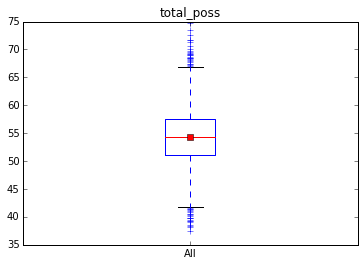

In [3]:
# Looking for Pace variables

#total possessions = (actual possessions - lost possesions)
# actual possessions = FGA - Off Rebounds + Blocks + Fouls resulting in FTs, but not and1 (proxy with FTA)
# lost possession = turnovers

master_pace = pd.DataFrame()
for s in list(set(reg_season.Season.values)):
    season_games = reg_season[reg_season['Season']==s]
    for t in ['W', 'L']:   #t is team, o is opponent
        o = 'W'
        if t=='W':
            o = 'L'
        season_games[(t+'total_poss')] = [fga - orb + blk + fta - to for fga, orb, blk, fta, to in zip(season_games[t+'fga'], season_games[t+'or'], season_games[o+'blk'], season_games[t+'fta'], season_games[t+'to'])]

    pace_w = season_games[['Wteam', 'Season', 'Wtotal_poss']].rename(index=str, columns={'Wteam':'Team', 'Wtotal_poss':'total_poss'})
    pace_l = season_games[['Lteam', 'Season', 'Ltotal_poss']].rename(index=str, columns={'Lteam':'Team', 'Ltotal_poss':'total_poss'})
    pace = pace_w.append(pace_l).reset_index(drop=True)
    master_pace = master_pace.append(pace).reset_index(drop=True)
    
pace_agg = master_pace.groupby(['Team', 'Season'])[['total_poss']].mean().reset_index()

desc_stats({'All':pace_agg}, 'total_poss')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


               All
Min           5.44
1Q            8.81
2Q            9.75
Mean          9.83
3Q           10.75
Max          16.39
Variance      2.17
Skew          0.34
n         50440.72


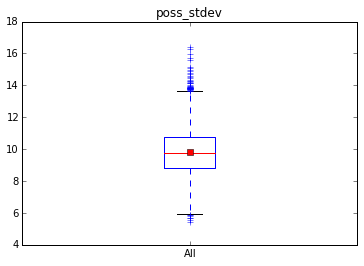

In [4]:
# Looking for consistency of Pace variables

#total possessions = (actual possessions - lost possesions)
# actual possessions = FGA - Off Rebounds + Blocks + Fouls resulting in FTs, but not and1 (proxy with FTA)
# lost possession = turnovers

master_pace = pd.DataFrame()
for s in list(set(reg_season.Season.values)):
    season_games = reg_season[reg_season['Season']==s]
    for t in ['W', 'L']:   #t is team, o is opponent
        o = 'W'
        if t=='W':
            o = 'L'
        season_games[(t+'total_poss')] = [fga - orb + blk + fta - to for fga, orb, blk, fta, to in zip(season_games[t+'fga'], season_games[t+'or'], season_games[o+'blk'], season_games[t+'fta'], season_games[t+'to'])]

    pace_w = season_games[['Wteam', 'Season', 'Wtotal_poss']].rename(index=str, columns={'Wteam':'Team', 'Wtotal_poss':'total_poss'})
    pace_l = season_games[['Lteam', 'Season', 'Ltotal_poss']].rename(index=str, columns={'Lteam':'Team', 'Ltotal_poss':'total_poss'})
    pace = pace_w.append(pace_l).reset_index(drop=True)
    master_pace = master_pace.append(pace).reset_index(drop=True)
    
pace_stdev = master_pace.groupby(['Team', 'Season'])[['total_poss']].std().reset_index()
pace_stdev = pace_stdev.rename(index=str, columns={'total_poss':'poss_stdev'})

desc_stats({'All':pace_stdev}, 'poss_stdev')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

              All
Min          0.46
1Q           0.88
2Q           0.94
Mean         0.93
3Q           0.97
Max          1.50
Variance     0.01
Skew        -0.60
n         4764.25


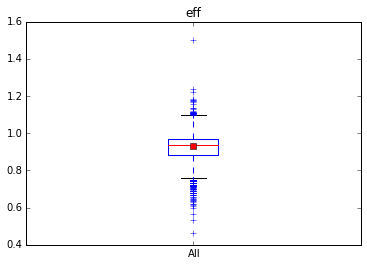

In [5]:
# Looking for Offensive Efficiency

# points per possession = points scored / possessions

master_oeff = pd.DataFrame()
for s in list(set(reg_season.Season.values)):
    season_games = reg_season[reg_season['Season']==s]
    
    for t in ['W', 'L']:   #t is team, o is opponent
        o = 'W'
        if t=='W':
            o = 'L'
        season_games[(t+'total_poss')] = [fga - orb + blk + fta - to for fga, orb, blk, fta, to in zip(season_games[t+'fga'], season_games[t+'or'], season_games[o+'blk'], season_games[t+'fta'], season_games[t+'to'])]

    season_games['Woff_eff'] = [pts / poss for pts, poss in zip(season_games['Wscore'], season_games['Wtotal_poss'])]
    season_games['Loff_eff'] = [pts / poss for pts, poss in zip(season_games['Lscore'], season_games['Ltotal_poss'])]

    eff_w = season_games[['Wteam', 'Season', 'Woff_eff']].rename(index=str, columns={'Wteam':'Team', 'Woff_eff':'eff'})
    eff_l = season_games[['Lteam', 'Season', 'Loff_eff']].rename(index=str, columns={'Lteam':'Team', 'Loff_eff':'eff'})
#    eff = eff_w.append(eff_l).reset_index(drop=True)
    master_oeff = master_oeff.append(eff_w).append(eff_l).reset_index(drop=True)

oeff_agg = master_oeff.groupby(['Team', 'Season']).mean().reset_index()

desc_stats({'All':oeff_agg}, 'eff')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

              All
Min          0.42
1Q           0.88
2Q           0.94
Mean         0.93
3Q           1.00
Max          1.86
Variance     0.01
Skew        -0.58
n         4773.31


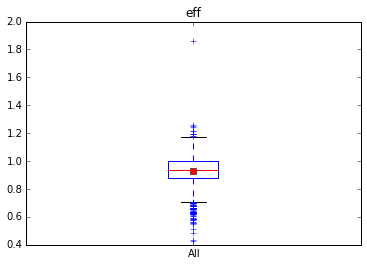

In [6]:
# Looking for Defensive Efficiency

# points per possession = points scored / possessions

master_deff = pd.DataFrame()
for s in list(set(reg_season.Season.values)):
    season_games = reg_season[reg_season['Season']==s]
    
    for t in ['W', 'L']:   #t is team, o is opponent
        o = 'W'
        if t=='W':
            o = 'L'
        season_games[(t+'total_poss')] = [fga - orb + blk + fta - to for fga, orb, blk, fta, to in zip(season_games[t+'fga'], season_games[t+'or'], season_games[o+'blk'], season_games[t+'fta'], season_games[t+'to'])]

    season_games['Loff_eff'] = [pts / poss for pts, poss in zip(season_games['Wscore'], season_games['Wtotal_poss'])]
    season_games['Woff_eff'] = [pts / poss for pts, poss in zip(season_games['Lscore'], season_games['Ltotal_poss'])]

    eff_w = season_games[['Wteam', 'Season', 'Woff_eff']].rename(index=str, columns={'Wteam':'Team', 'Woff_eff':'eff'})
    eff_l = season_games[['Lteam', 'Season', 'Loff_eff']].rename(index=str, columns={'Lteam':'Team', 'Loff_eff':'eff'})
#    eff = eff_w.append(eff_l).reset_index(drop=True)
    master_deff = master_deff.append(eff_w).append(eff_l).reset_index(drop=True)

deff_agg = master_deff.groupby(['Team', 'Season']).mean().reset_index()

desc_stats({'All':deff_agg}, 'eff')

              All
Min          0.00
1Q           0.36
2Q           0.50
Mean         0.49
3Q           0.63
Max          1.00
Variance     0.04
Skew        -0.04
n         2534.15


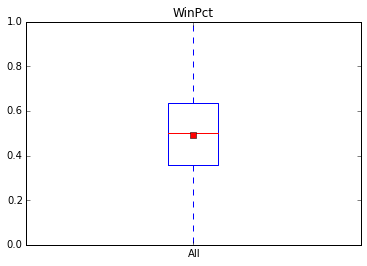

In [7]:
# Looking for strength of schedule

#SOS = win_pct of teams they play * 2/3 + 1/3 * win_pct of team the teams play

#Gets win percentage of each team
win_pct = pd.DataFrame()
for s in list(set(reg_season.Season.values)):
    games = reg_season[reg_season['Season']==s]
    
    team_win_pct = pd.DataFrame()
    for team in list(set(games['Lteam'].values) | set(games['Wteam'].values)):
        wins = len(games[games['Wteam']==team])
        losses = len(games[games['Lteam']==team])
        team_win_pct.set_value(team, 'WinPct', 1.0*wins/(wins+losses))
    team_win_pct['Season'] = s
    team_win_pct = team_win_pct.reset_index()
    team_win_pct = team_win_pct.reset_index().rename(index=str, columns={'index':'Team'})
    win_pct = win_pct.append(team_win_pct).reset_index(drop=True)

desc_stats({'All':win_pct}, 'WinPct')

              All
Min          0.34
1Q           0.46
2Q           0.49
Mean         0.50
3Q           0.54
Max          0.65
Variance     0.00
Skew         0.12
n         2557.40


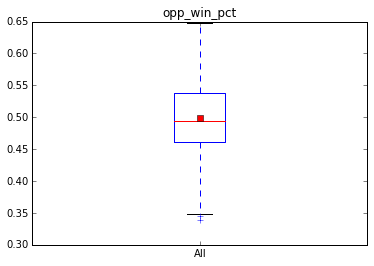

In [8]:
#Gets win percentage of opponents
opp_win_pct = pd.DataFrame()
idx = 0
for s in list(set(reg_season.Season.values)):
    games = reg_season[reg_season['Season']==s]
    
    for team in list(set(games['Lteam'].values) | set(games['Wteam'].values)):
        opp_l = games[games['Lteam']==team][['Wteam']].rename(index=str, columns={'Wteam':'Team'})
        opp_w = games[games['Wteam']==team][['Lteam']].rename(index=str, columns={'Lteam':'Team'})
        opp = opp_l.append(opp_w).reset_index(drop=True)
        opp['Season'] = s
        opp_records = opp.merge(win_pct, on=['Season', 'Team'], how='inner')
        opp_avg_records = opp_records['WinPct'].mean()
        opp_win_pct.set_value(idx, 'Team', team)
        opp_win_pct.set_value(idx, 'Season', s)
        opp_win_pct.set_value(idx, 'opp_win_pct', opp_avg_records)
        idx += 1
        
desc_stats({'All':opp_win_pct}, 'opp_win_pct')        

              All
Min          0.43
1Q           0.48
2Q           0.49
Mean         0.50
3Q           0.52
Max          0.57
Variance     0.00
Skew         0.26
n         2560.02


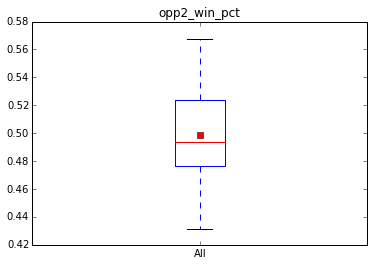

In [9]:
#Gets win percentage of opponents opponents
opp2_win_pct = pd.DataFrame()
idx = 0
for s in list(set(reg_season.Season.values)):
    games = reg_season[reg_season['Season']==s]
    
    for team in list(set(games['Lteam'].values) | set(games['Wteam'].values)):
        opp_l = games[games['Lteam']==team][['Wteam']].rename(index=str, columns={'Wteam':'Team'})
        opp_w = games[games['Wteam']==team][['Lteam']].rename(index=str, columns={'Lteam':'Team'})
        opp = opp_l.append(opp_w).reset_index(drop=True)
        opp['Season'] = s
        opp2_records = opp.merge(opp_win_pct, on=['Season', 'Team'], how='inner')
        opp2_avg_records = opp2_records['opp_win_pct'].mean()
        opp2_win_pct.set_value(idx, 'Team', team)
        opp2_win_pct.set_value(idx, 'Season', s)
        opp2_win_pct.set_value(idx, 'opp2_win_pct', opp2_avg_records)
        idx += 1
        
desc_stats({'All':opp2_win_pct}, 'opp2_win_pct')    

              All
Min          0.38
1Q           0.47
2Q           0.49
Mean         0.50
3Q           0.53
Max          0.62
Variance     0.00
Skew         0.18
n         2558.28


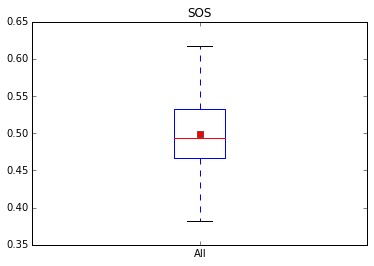

In [10]:
#Compiles SOS metric
sos_agg = pd.DataFrame()
sos_agg['Team'] = win_pct['Team']
sos_agg['Season'] = win_pct['Season']
sos_agg['SOS'] = [(2.0/3.0)*o + (1.0/3.0)*oo for o, oo in zip(opp_win_pct['opp_win_pct'], opp2_win_pct['opp2_win_pct'])]

desc_stats({'All':sos_agg}, 'SOS')    

              All
Min         -0.37
1Q           0.16
2Q           0.28
Mean         0.28
3Q           0.40
Max          1.00
Variance     0.03
Skew        -0.01
n         1436.09


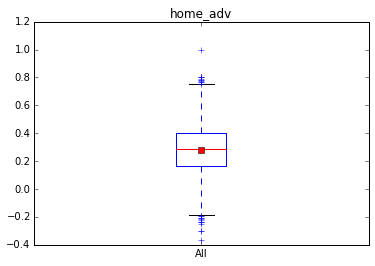

In [11]:
# Looking for success on road

#Win percentage difference when at road or at neutral vs when at home

team_home_adv = pd.DataFrame()
idx = 0
for s in list(set(reg_season.Season.values)):
    games = reg_season[reg_season['Season']==s]
    
    for team in list(set(games['Lteam'].values) | set(games['Wteam'].values)):
        #When at home
        wins_h = len(games[(games['Wteam']==team) & (games['Wloc']=='H')])
        losses_h = len(games[(games['Lteam']==team) & (games['Wloc']=='A')])
        if (wins_h + losses_h)==0:
            home_pct = 0
        else:
            home_pct = 1.0*wins_h/(wins_h+losses_h)
        #When away or in neutral
        wins_a = len(games[(games['Wteam']==team) & (games['Wloc'].isin(['A', 'N']))])
        losses_a = len(games[(games['Lteam']==team) & (games['Wloc'].isin(['H', 'N']))]) 
        away_pct = 1.0*wins_a/(wins_a+losses_a)
        team_home_adv.set_value(idx, 'Team', team)
        team_home_adv.set_value(idx, 'Season', s)
        team_home_adv.set_value(idx, 'home_adv', home_pct - away_pct)
        idx += 1

desc_stats({'All':team_home_adv}, 'home_adv')


             All
Min         0.06
1Q          0.16
2Q          0.19
Mean        0.19
3Q          0.22
Max         0.35
Variance    0.00
Skew        0.39
n         975.49


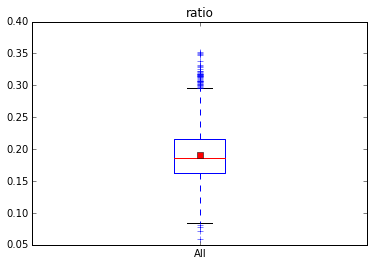

In [12]:
# Looking for 3 point offense

# 3pt offense = (3 pointers made / (all shots made + shots resulting in FT)
reg_season['W32Ratio'] = [1.0*x/(y+z*0.5) for x,y,z in zip(reg_season['Wfgm3'], reg_season['Wfgm'], reg_season['Wfta'])]
reg_season['L32Ratio'] = [1.0*x/(y+z*0.5) for x,y,z in zip(reg_season['Lfgm3'], reg_season['Lfgm'], reg_season['Lfta'])]

W3p = reg_season[['Wteam', 'Season',  'W32Ratio']].rename(index=str, columns={'Wteam':'Team', 'W32Ratio':'ratio'})
L3p = reg_season[['Lteam', 'Season', 'L32Ratio']].rename(index=str, columns={'Lteam':'Team', 'L32Ratio':'ratio'})
o3P = W3p.append(L3p).reset_index(drop=True)

o3P_agg = o3P.groupby(['Team', 'Season'])[['ratio']].mean().reset_index()

desc_stats({'All':o3P_agg}, 'ratio')

             All
Min         0.10
1Q          0.17
2Q          0.19
Mean        0.19
3Q          0.21
Max         0.32
Variance    0.00
Skew        0.31
n         974.27


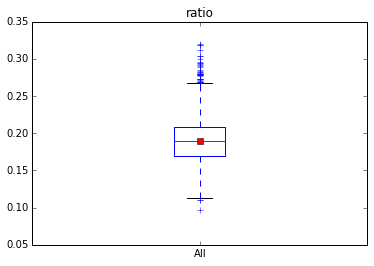

In [13]:
# Looking for 3 point defense

# 3pt offense = (3 pointers made / (all FG made + shots resulting in FT)
reg_season['L32Ratio'] = [1.0*x/(y+z*0.5) for x,y,z in zip(reg_season['Wfgm3'], reg_season['Wfgm'], reg_season['Wfta'])]
reg_season['W32Ratio'] = [1.0*x/(y+z*0.5) for x,y,z in zip(reg_season['Lfgm3'], reg_season['Lfgm'], reg_season['Lfta'])]

W3p = reg_season[['Wteam', 'Season', 'W32Ratio']].rename(index=str, columns={'Wteam':'Team', 'W32Ratio':'ratio'})
L3p = reg_season[['Lteam', 'Season', 'L32Ratio']].rename(index=str, columns={'Lteam':'Team', 'L32Ratio':'ratio'})
d3P = W3p.append(L3p).reset_index(drop=True)

d3P_agg = d3P.groupby(['Team', 'Season'])[['ratio']].mean().reset_index()

desc_stats({'All':d3P_agg}, 'ratio')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


            All
Min       -0.96
1Q        -0.17
2Q         0.00
Mean       0.01
3Q         0.18
Max        1.00
Variance   0.07
Skew       0.04
n         27.69


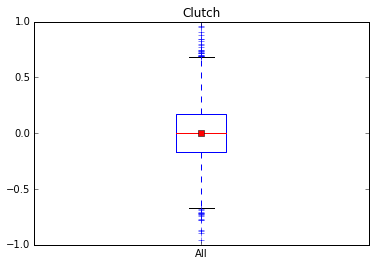

In [14]:
# Looking at close game performance

#Difference Win percentage when games are within 5 points or go to OT vs other scenarios

team_clutch_win = pd.DataFrame()
idx = 0
for s in list(set(reg_season.Season.values)):
    games = reg_season[reg_season['Season']==s]
    games['Score_Diff'] = [w-l for w,l in zip(games['Wscore'], games['Lscore'])]
    games_close = games[(games['Score_Diff']<=5) | (games['Numot']>0)]
    games_non_close = games[(games['Score_Diff']>5) & (games['Numot']==0)]
    
    for team in list(set(games['Lteam'].values) | set(games['Wteam'].values)):
        wins_close = len(games_close[games_close['Wteam']==team])
        losses_close = len(games_close[games_close['Lteam']==team])
        if (wins_close+losses_close) == 0:
            close_pct = 0
        else:
            close_pct = 1.0*wins_close/(wins_close + losses_close)
        
        wins_non_close = len(games_non_close[games_non_close['Wteam']==team])
        losses_non_close = len(games_non_close[games_non_close['Lteam']==team])
        non_close_pct = 1.0*wins_non_close/(wins_non_close + losses_non_close)
        
        team_clutch_win.set_value(idx, 'Team', team)
        team_clutch_win.set_value(idx, 'Season', s)
        team_clutch_win.set_value(idx, 'Clutch', close_pct - non_close_pct)
        idx += 1

desc_stats({'All':team_clutch_win}, 'Clutch')

In [15]:
#combines all features into one file
features = pace_agg
print len(features)
features = features.merge(pace_stdev, on=['Team', 'Season'])
print len(features)
features = features.merge(oeff_agg, on=['Team', 'Season'])
print len(features)
features = features.merge(deff_agg, on=['Team', 'Season'])
print len(features)
features = features.rename(index=str, columns={'eff_x':'oeff', 'eff_y':'deff'})
features = features.merge(sos_agg, on=['Team', 'Season'])
print len(features)
features = features.merge(team_home_adv, on=['Team', 'Season'])
print len(features)
features = features.merge(o3P_agg, on=['Team', 'Season'])
print len(features)
features = features.merge(d3P_agg, on=['Team', 'Season'])
print len(features)
features = features.rename(index=str, columns={'ratio_x':'o3P', 'ratio_y':'d3P'})
features = features.merge(win_pct[['Team', 'Season', 'WinPct']], on=['Team', 'Season'])
print len(features)
features = features.merge(team_clutch_win, on=['Team', 'Season'])
print len(features)

5130
5130
5130
5130
5130
5130
5130
5130
5130
5130


In [16]:
features.to_csv(os.path.join(proc_path, 'team_features_2017.csv'), index=False)